**Generating Scale Free Networks**

The Barabasi-Albert model randomly generates graphs with scale-free properties. The algorithm begins with a fully connected graph of size m_0. New nodes are added to the network successively up to a desired network size. Each time a new node is added, it is connected to m <= m_0 existing nodes. The probability that a new node is connected to existing node i is given as: **Pi = Ki / sum_to_j(Kj)** where Ki is the degree of node i and the sum of Kj is made over all existing nodes j. 
Then, new nodes have a 'preference' to connect with existing nodes that have a larger degree, meaning that they are already well connected. 
This method of graph creation is known as preferential attachment. 

In [2]:
import random 
import itertools
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt 

In [3]:
def barabasi_albert_node(G, n):
    # Node & Degree for each node in G excluding new node 
    degree = [d for (n, d) in G.degree]
    # Probability for each node 
    # There are no edges from node n 
    pr = np.divide(degree, (2 * len(G.edges())))
    
    return np.random.choice(G.nodes(), p = pr)


def barabasi_albert_edge(G, n): 
    dest = barabasi_albert_node(G, n)
    edge = (n, dest)
    
    # Recurse to add new non-existing edge 
    if edge in G.edges():
        barabasi_albert_edge(G, n)
        return
    
    # Avoid self-edges
    # Self edges should not occur (probability to choose n is zero)
    # However, they do appear in this implementation FIX LATER
    if n == dest:
        barabasi_albert_edge(G, n)
        return
    
    G.add_edge(n, dest)

In [4]:
# Produce a scale-free network represented as a networkx graph 
#    object with initial size m and final size n
# m: Initial size of graph
# n: Final size of graph 
# return: Networkx graph model 
def barabasi_albert(m, n):
    # Begin with a fully connected graph size m
    G = nx.complete_graph(m)
    
    for n in range(m, n):
        G.add_node(n)
        
        # Connect new node to m existing nodes 
        for i in range(m):
            barabasi_albert_edge(G, n)
    
    return G 

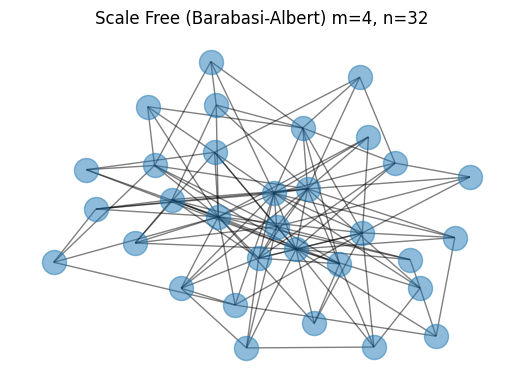

In [48]:
G_paper_example = barabasi_albert(4, 32)

G_sizes = []
for size in [100, 225, 500]:
    G_sizes.append(barabasi_albert(12, size))


plt.figure(figsize=(6.5,4.5))
plt.title("Scale Free (Barabasi-Albert) m=4, n=32")
nx.draw(G_paper_example, alpha= 0.5)
plt.savefig("./plots/ba/example_small.jpg")

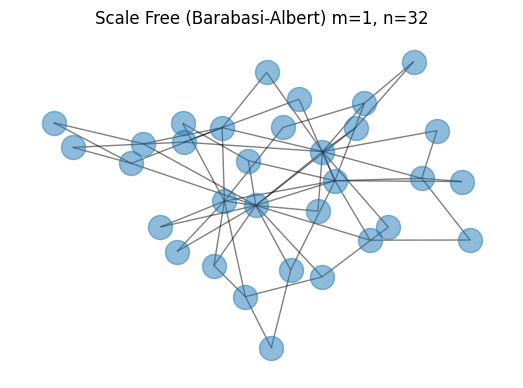

In [80]:
G_paper_one = barabasi_albert(2, 32)

plt.figure(figsize=(6.5,4.5))
plt.title("Scale Free (Barabasi-Albert) m=1, n=32")
nx.draw(G_paper_one, alpha= 0.5)
plt.savefig("./plots/ba/example_m1.jpg")

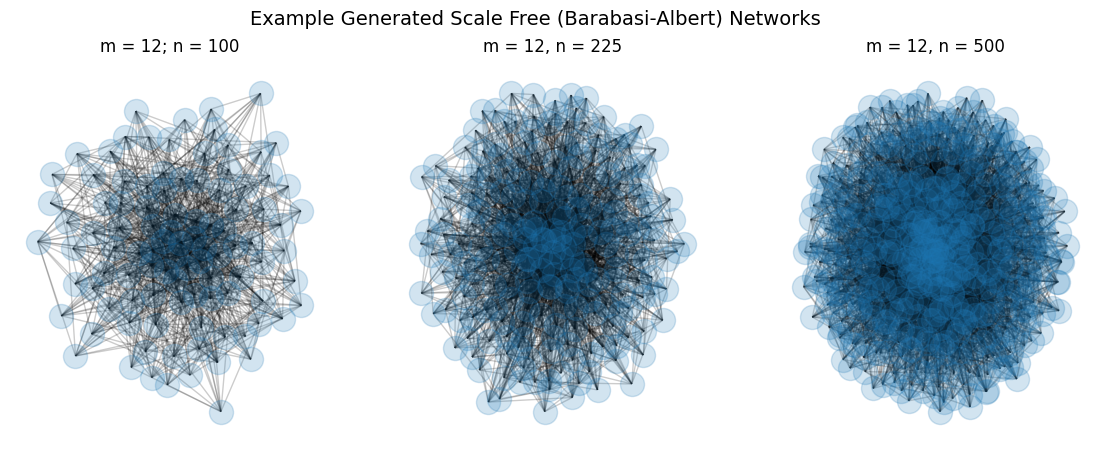

In [172]:
fig, axs = plt.subplots(1, 3, figsize = (14, 5))
fig.suptitle("Example Generated Scale Free (Barabasi-Albert) Networks", fontsize = 14)
for i in range(3):
    nx.draw(G_sizes[i], alpha = 0.2, ax = axs[i]) 
axs[0].set_title("m = 12; n = 100", fontsize = 12)
axs[1].set_title("m = 12, n = 225", fontsize = 12)
axs[2].set_title("m = 12, n = 500", fontsize = 12)
plt.savefig("./plots/ba/example_sizes.jpg", dpi = 300)

In [152]:
# Generate a new large ba graph for statistics
G = barabasi_albert(12, 500)

<Figure size 800x800 with 0 Axes>

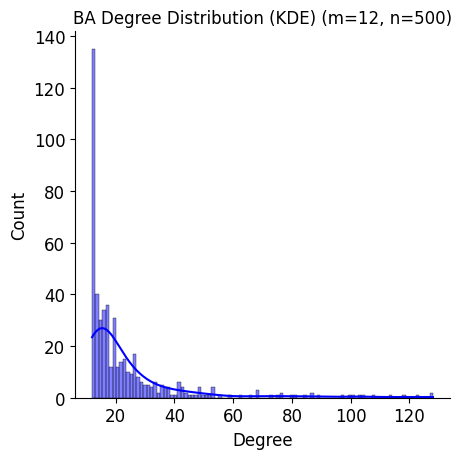

In [166]:
import seaborn as sns
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)

degree_seq = [d for (n, d) in G.degree]
plt.figure(figsize = (8,8))
sns.displot(degree_seq, kde=True, bins=100, color='blue')
plt.title("BA Degree Distribution (KDE) (m=12, n=500)", fontsize = 12)
plt.xlabel("Degree", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.tight_layout()
plt.savefig("./plots/ba/degree_density_500.jpg", dpi = 300)
plt.show()

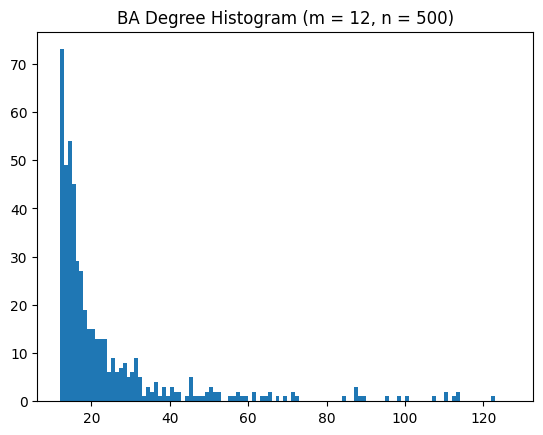

In [75]:
# Get degree sequence of graph 
degree_seq = [d for (n, d) in G.degree]
max_degree = max(degree_seq)
min_degree = min(degree_seq)

plt.figure()
count, bins, ign = plt.hist(degree_seq, bins = range(min_degree, max_degree), density = False, align = 'mid')
plt.title("BA Degree Histogram (m = 12, n = 500)")
plt.savefig("./plots/ba/degree_histogram.jpg")
plt.show()

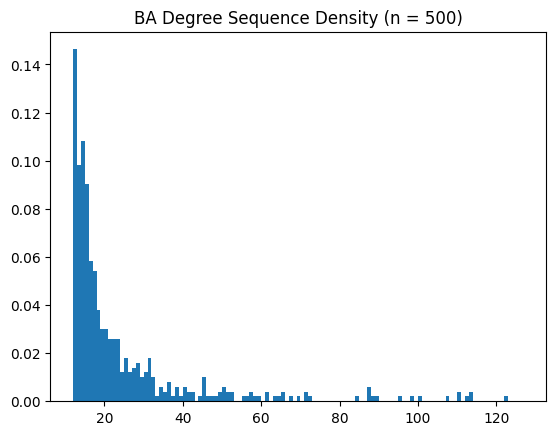

In [76]:
# Get degree sequence of graph 
degree_seq = [d for (n, d) in G.degree]

plt.figure()
count, bins, ign = plt.hist(degree_seq, bins = range(min_degree, max_degree), density = True, align = 'mid')
plt.title("BA Degree Sequence Density (n = 500)")
plt.savefig("./plots/ba/degree_dist_density.jpg")
plt.show()

In [67]:
def get_degree_histogram(G, norm = True):
    count = nx.degree_histogram(G)
    bin_space = list(np.arange(0, len(count)))
    
    nodes = G.number_of_nodes()
    # Normalise histogram
    if norm:
        for i in range(len(count)):
            count[i] = count[i] / nodes
     
    return bin_space, count

In [ ]:
G_pl = barabasi_albert(12, 1500)

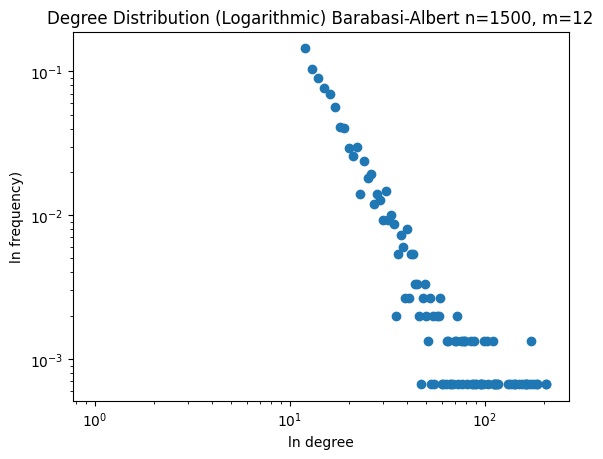

In [73]:
x, y = get_degree_histogram(G_pl, norm = True)

plt.title('Degree Distribution (Logarithmic) Barabasi-Albert n=1500, m=12')
plt.xlabel('ln degree')
plt.ylabel('ln frequency)')
plt.xscale("log")
plt.yscale("log")
plt.plot(x, y, 'o')
plt.savefig("./plots/ba/degree_dist_log")

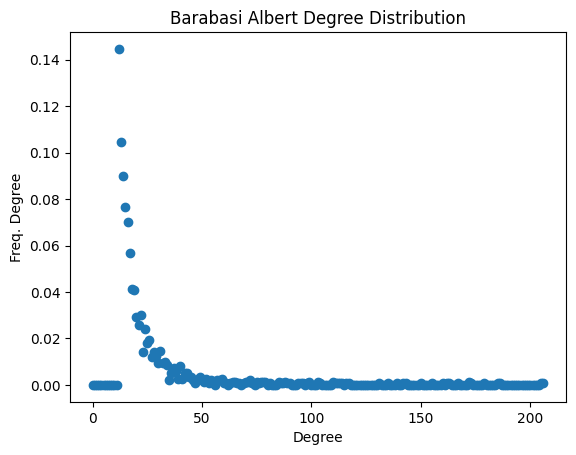

In [78]:
plt.title('Barabasi Albert Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Freq. Degree')
plt.plot(x, y, 'o')
plt.savefig("./plots/ba/ghetto_degree_dist.jpg")

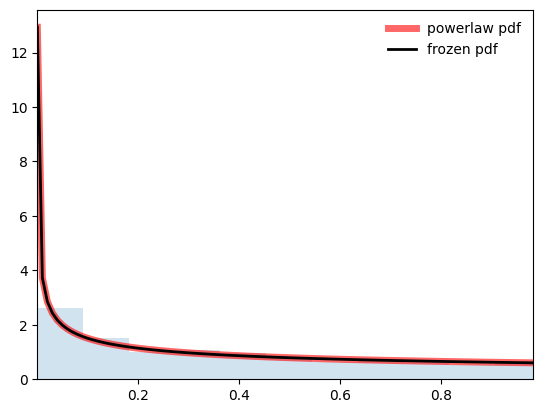

In [92]:
from scipy.stats import powerlaw

fig, ax = plt.subplots(1, 1)
a = 0.6

mean, var, skew, kurt = powerlaw.stats(a, moments='mvsk')

x = np.linspace(powerlaw.ppf(0.01, a),

                powerlaw.ppf(0.99, a), 100)

ax.plot(x, powerlaw.pdf(x, a),

       'r-', lw=5, alpha=0.6, label='powerlaw pdf')

rv = powerlaw(a)

ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = powerlaw.rvs(a, size=1000)
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)

ax.set_xlim([x[0], x[-1]])

ax.legend(loc='best', frameon=False)

plt.show()

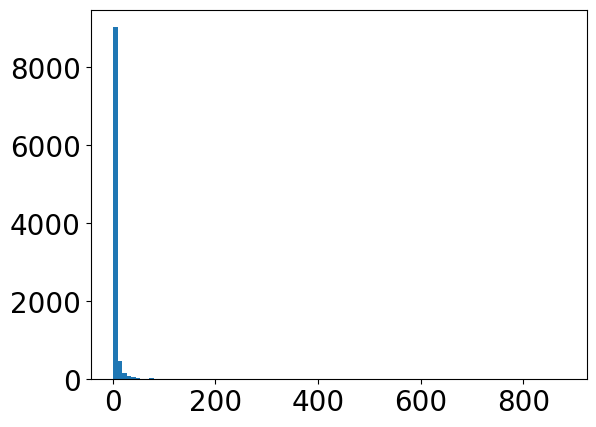

In [149]:
from scipy import *
from matplotlib.pyplot import *
matplotlib.rcParams.update({'font.size': 20})

Nnodes = 10000
power=-2
maxdegree = 999
mindegree=1

ks = ((maxdegree**(power+1)-mindegree**(power+1) )
      *np.random.random(Nnodes)+mindegree**(power+1))**(1/(power + 1))

[counts,bins,patches]=hist(ks,bins=100)

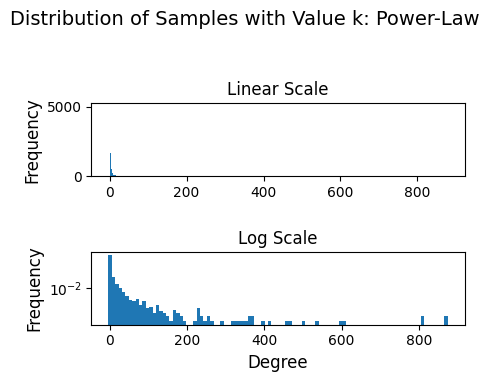

In [150]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (5, 4))
fig.suptitle("Distribution of Samples with Value k: Power-Law", fontsize = 14)
subplot(2,1,1)
ax1.bar(bins[:-1],counts/float(sum(counts)),width=bins[1]-bins[0])
ax1.set(ylabel = "Frequency")
ax1.set_title("Linear Scale")

ax1.title.set_fontsize(12)
ax1.xaxis.label.set_fontsize(12)
ax1.yaxis.label.set_fontsize(12)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='minor', labelsize=10)

ax2.bar(bins[:-1],counts/float(sum(counts)),width=bins[1]-bins[0],log=True)
ax2.set(xlabel="Degree", ylabel="Frequency") 
ax2.set_title("Log Scale")
ax2.title.set_fontsize(12)
ax2.xaxis.label.set_fontsize(12)
ax2.yaxis.label.set_fontsize(12)
ax2.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='minor', labelsize=10)
fig.tight_layout()
savefig("./plots/ba/power_law_dist.jpg")



maxdegfound=int(np.ceil(max(bins)))
[counts,bins,patches]=hist(ks,bins=maxdegfound)


countsnozero=counts*1.
countsnozero[counts==0] = float('inf')

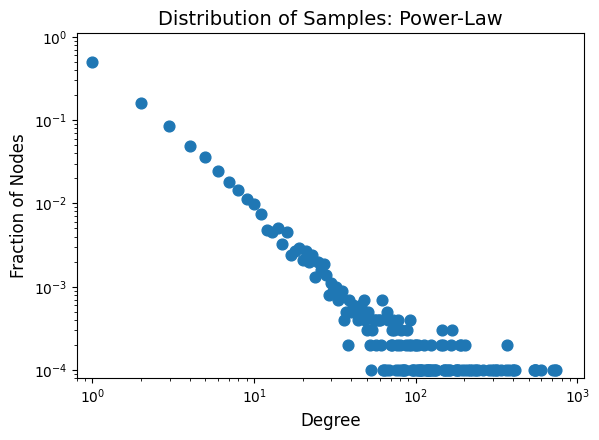

In [134]:

fig = figure()
scatter(bins[:-1],countsnozero/float(sum(counts)),s=60)
plt.title("Distribution of Samples: Power-Law", fontsize = 14)
yscale('log')
xscale('log')
ylim(0.00008,1.1)
xlim(0.8,1100)
xticks(fontsize = 10)
yticks(fontsize = 10)
xlabel('Degree', fontsize = 12)
ylabel("Fraction of Nodes", fontsize = 12)
subplots_adjust(bottom=0.15)
fig.tight_layout()
savefig("./plots/ba/power_law_dist_loglog.jpg", transparent=True, dpi=150)